# 배달 데이터 그룹화에 따른 변화 살펴보기


* 그룹화는 비슷한 집단끼리 묶어줌에 따라 정보의 특성을 더 활용도 있게 살펴 볼 수 있다고 봄.

* 예를 들면 시도로 나누는 방법, 시군구로 나누는방법이 대표적이며, 

* 때에 따라서는 코로나확진자수가 많이나온 지역, 1인가구 또는 아파트비율이 높고낮게 형성된 지역에 따라

* 배달데이터 건수 또는 배달품목의 변화가 있을것으로 보고 분류(군집)분석을 초점에서 분석을 실시했습니다.

In [3]:
# 배달 데이터 분석

# 사용한 데이터셋

delivery   : 배달 호출 데이터
covid_conf : 코로나확진자수,사망자수 출처: 통계청
        
# 데이터 셋 열

- Delivery 데이터 전처리
# 사용한 배달 호출 정보 데이터 열
PROCESS_DT : 처리일시
DLVR_STORE_ID : 배달상점ID
DLVR_STORE_INDUTY_NM : 배달상점 업종이름
DLVR_DSTN_SIDO : 배달목적지 주소 법정동 시도명
DLVR_DSTN_SIGUNGU : 배달목적지 주소 법정동 시군구명
DLVR_DSTN_DONG : 배달목적지 주소 법정동 읍면동명
DLVR_DSTN_ADSTRD_CODE : 배달목적지 주소 행정동 코드
DLVR_DSTN_RDNMADR_CODE : 배달목적지주소 도로명주소 코드
GOODS_AMOUNT : 배달상품금액
SETLE_KND_VALUE : 결제종류번호 (1:카드, 2:선불, 3:현금)
DLVR_RCEPT_TIME : 배달접수시간
    
- Covid 데이터
conf : 확진자 수
death : 사망자 수

SyntaxError: invalid syntax (<ipython-input-3-036a9cfae797>, line 5)

In [11]:
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=34471d5018d6c7fe70c3bb0620f92749c98b04fb0a51ae118217f90b2fbbd327
  Stored in directory: c:\users\박성진~1\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt


from IPython.display import Image

In [5]:
# 그래프 그리기 위한 plotly
import plotly.express as px

import plotly.io as pio
pio.renderers.default = "notebook_connected"

import plotly.offline as pyo
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

In [6]:
# -*- coding: utf-8 -*-

import pandas as pd

file_path = '../data/delivery.csv'
delivery = pd.read_csv(file_path, sep = ',', encoding='utf-8')
delivery

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158319,10672688,2020-06-21,C000312,1,C000312,S0029529,야식,4125010200,경기도,동두천시,...,D0013004,3000,500,26000,1,승인:하나카드,2020-06-21 22:48:22,2020-06-21 22:48:37,2020-06-21 23:07:47,NaN
5158320,10672689,2020-06-21,C000026,1,C000026,S0026242,야식,1132010800,서울특별시,도봉구,...,D0006251,3600,55,22000,2,NaN,2020-06-21 22:57:15,2020-06-21 22:58:00,2020-06-21 23:18:20,NaN
5158321,10672690,2020-06-21,C000130,1,C000130,S0042234,야식,4128112300,경기도,고양시 덕양구,...,D0012754,3000,300,17000,2,NaN,2020-06-21 22:55:08,2020-06-21 22:55:22,2020-06-21 23:14:45,NaN
5158322,10672691,2020-06-21,C000237,1,C000237,S0021766,족발/보쌈,4121010200,경기도,광명시,...,D0004485,3630,200,53700,1,승인:비씨카드사,2020-06-21 23:10:38,2020-06-21 23:11:03,2020-06-21 23:25:10,NaN


In [7]:
del_dstn = delivery.loc[:,['PROCESS_DT','DLVR_STORE_ID','DLVR_DSTN_SIDO','DLVR_DSTN_SIGUNGU','DLVR_DSTN_DONG',
                'DLVR_DSTN_ADSTRD_CODE','DLVR_DSTN_RDNMADR_CODE','DLVR_STORE_INDUTY_NM','GOODS_AMOUNT','SETLE_KND_VALUE','DLVR_RCEPT_TIME']]

In [8]:
# 열이름 간단하게 변경
del_dstn = del_dstn.rename({'DLVR_DSTN_SIDO':'si_name','DLVR_DSTN_SIGUNGU':'gu_name',
                            'DLVR_DSTN_DONG':'dong_name','DLVR_STORE_INDUTY_NM':'induty_nm','DLVR_DSTN_ADSTRD_CODE':'adstrd_code'},
                           axis = 'columns')

# 행정동코드 전처리
del_dstn.adstrd_code = del_dstn.adstrd_code.astype(str) 
del_dstn.adstrd_code = del_dstn.adstrd_code.apply(lambda x : x[:8])

# 날짜 타입 변경 및 년도, 월 열 만들기
del_dstn['PROCESS_DT'] = pd.to_datetime(del_dstn['PROCESS_DT'], format='%Y-%m-%d')
del_dstn['year'] = pd.DatetimeIndex(del_dstn['PROCESS_DT']).year
del_dstn['month'] = pd.DatetimeIndex(del_dstn['PROCESS_DT']).month
del_dstn.head()

,PROCESS_DT,DLVR_STORE_ID,si_name,gu_name,dong_name,adstrd_code,DLVR_DSTN_RDNMADR_CODE,induty_nm,GOODS_AMOUNT,SETLE_KND_VALUE,DLVR_RCEPT_TIME,year,month
0,2020-01-01,S0032342,경상남도,창원시 마산회원구,석전동,48127545,4.812748e+11,치킨,25000,1,2020-01-01 00:15:49,2020,1
1,2020-01-01,S0021847,서울특별시,금천구,가산동,11545510,1.154531e+11,찜탕,49000,2,2020-01-01 01:12:14,2020,1
2,2020-01-01,S0025740,서울특별시,은평구,갈현동,11380552,1.138041e+11,치킨,23000,3,2020-01-01 00:01:14,2020,1
3,2020-01-01,S0039634,경기도,의정부시,의정부동,41150510,4.115043e+11,한식,20000,2,2020-01-01 01:01:34,2020,1
4,2020-01-01,S0002237,경기도,고양시 덕양구,주교동,41281510,4.128144e+11,한식,32000,2,2020-01-01 01:05:06,2020,1


In [9]:
# DLVR_STORE_INDUTY_NM(업종 이름) 기준으로 묶어주기
deliveryname = del_dstn.groupby(['induty_nm']).size().reset_index(name='count')

deliveryname

,induty_nm,count
0,도시락,49254
1,돈까스/일식,251112
2,배달전문업체,94837
3,분식,626945
4,심부름,5344
5,아시안/양식,109185
6,야식,226043
7,족발/보쌈,415060
8,중식,187030
9,찜탕,214388


# 어떤 업종이 가장 많이 차지하는지 확인하기

In [10]:
# 막대 그래프 그리기
trace1 = go.Bar(x=deliveryname['induty_nm'], y=deliveryname['count'])
data = [trace1]
layout = go.Layout(title='업종별 배달비율')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

# 1순위 치킨 2 순위 한식 3순위 분식 4순위 카페디저트 5순위 족발 순이었다.

In [11]:
# DLVR_STORE_SIDO(배달 지역) 기준으로 묶어주기
districtname = del_dstn.groupby(['si_name']).size().reset_index(name='count')

districtname

,si_name,count
0,강원도,12632
1,경기도,2736607
2,경상남도,266602
3,경상북도,174840
4,광주광역시,11229
5,대구광역시,63024
6,대전광역시,65301
7,부산광역시,29792
8,서울특별시,818496
9,울산광역시,3


# 시도별 배달비율확인 (추후 어느지역을 중점적으로 분석할 것인가)

In [12]:
# 시도별 막대그래프

# 막대 그래프 그리기
trace1 = go.Bar(x=districtname['si_name'], y=districtname['count'])
data = [trace1]
layout = go.Layout(title='시도별 배달비율')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [13]:
# 상위 5개 시도의 주문개수

df_sort_group_top5 = districtname.sort_values(by="count", ascending=False).groupby("si_name").head(10)
df_sort5 = df_sort_group_top5.head(5)
df_sort5



,si_name,count
1,경기도,2736607
8,서울특별시,818496
2,경상남도,266602
3,경상북도,174840
14,충청남도,168084


In [14]:
# 상위 5개 막대 그래프 그리기
trace1 = go.Bar(x=df_sort5['si_name'], y=df_sort5['count'])
data = [trace1]
layout = go.Layout(title='시도별 배달비율')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

# 지역별로 컬럼을 만들고 음식업종 이름 살펴보기 (4집단으로 분류)
  * 지역별로 선호하는 음식의 기호가 다를 수 있다고 판단하고 각 지역별 주문된 음식에 대해 알고싶어서
  * 크게4개집단 나눔 
  * 서울특별시/경기/인천광역시
  * 경상남도/경상북도/대구광역시/부산광역시   
  * 전라남도/전라북도/광주광역시 
  * 충청남도/충청북도/대전광역시(concat 함수를 이용해서 생성)

In [15]:
# 그룹1 수도권 (서울특별시, 경기도, 인천광역시)
is_kgd = del_dstn['si_name'] == '경기도'
kgd = del_dstn[is_kgd]

is_seoul = del_dstn['si_name'] == '서울특별시'
seoul = del_dstn[is_seoul]

is_inch = del_dstn['si_name'] == '인천광역시'
inch = del_dstn[is_inch]

gr1 = pd.concat([kgd, seoul, inch])
gr1

,PROCESS_DT,DLVR_STORE_ID,si_name,gu_name,dong_name,adstrd_code,DLVR_DSTN_RDNMADR_CODE,induty_nm,GOODS_AMOUNT,SETLE_KND_VALUE,DLVR_RCEPT_TIME,year,month
3,2020-01-01,S0039634,경기도,의정부시,의정부동,41150510,4.115043e+11,한식,20000,2,2020-01-01 01:01:34,2020,1
4,2020-01-01,S0002237,경기도,고양시 덕양구,주교동,41281510,4.128144e+11,한식,32000,2,2020-01-01 01:05:06,2020,1
5,2020-01-01,S0001485,경기도,부천시,심곡동,41190603,4.119030e+11,족발/보쌈,37000,1,2020-01-01 00:59:31,2020,1
7,2020-01-01,S0001037,경기도,부천시,송내동,41190746,4.119044e+11,야식,28500,2,2020-01-01 00:09:40,2020,1
9,2020-01-01,S0028777,경기도,의정부시,낙양동,41150578,4.115032e+11,야식,22000,1,2020-01-01 00:10:34,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158158,2020-06-21,S0019943,인천광역시,부평구,부평동,28237510,2.823732e+11,한식,31000,1,2020-06-21 22:53:03,2020,6
5158169,2020-06-21,S0043710,인천광역시,부평구,부개동,28237660,2.823732e+11,한식,30000,2,2020-06-21 23:29:45,2020,6
5158200,2020-06-21,S0019950,인천광역시,부평구,부평동,28237550,2.823732e+11,한식,25500,1,2020-06-21 22:52:26,2020,6
5158203,2020-06-21,S0040809,인천광역시,부평구,산곡동,28237581,2.823730e+11,치킨,19900,2,2020-06-21 23:10:49,2020,6


In [16]:
# 그룹2 동남권 (경상남도/경상북도/대구광역시/부산광역시)
is_kn = del_dstn['si_name'] == '경상남도'
kn= del_dstn[is_kn]

is_kb = del_dstn['si_name'] == '경상북도'
kb = del_dstn[is_kb]

is_dk = del_dstn['si_name'] == '대구광역시'
dk = del_dstn[is_dk]

is_bs = del_dstn['si_name'] == '부산광역시'
bs = del_dstn[is_bs]

gr2 = pd.concat([kn, kb, dk, bs])
gr2

,PROCESS_DT,DLVR_STORE_ID,si_name,gu_name,dong_name,adstrd_code,DLVR_DSTN_RDNMADR_CODE,induty_nm,GOODS_AMOUNT,SETLE_KND_VALUE,DLVR_RCEPT_TIME,year,month
0,2020-01-01,S0032342,경상남도,창원시 마산회원구,석전동,48127545,4.812748e+11,치킨,25000,1,2020-01-01 00:15:49,2020,1
34,2020-01-01,S0021051,경상남도,진주시,초전동,48170695,4.817033e+11,족발/보쌈,28000,1,2020-01-01 00:53:31,2020,1
56,2020-01-01,S0019888,경상남도,진주시,상봉동,48170595,4.817048e+11,치킨,23000,3,2020-01-01 00:15:13,2020,1
75,2020-01-01,S0021495,경상남도,진주시,상봉동,48170595,4.817033e+11,치킨,23400,2,2020-01-01 00:52:05,2020,1
79,2020-01-01,S0019862,경상남도,진주시,신안동,48170715,4.817048e+11,피자,17000,2,2020-01-01 00:27:04,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5157393,2020-06-21,S0023340,부산광역시,강서구,명지동,26440535,2.644034e+11,치킨,18000,1,2020-06-21 23:36:35,2020,6
5157771,2020-06-21,S0035510,부산광역시,강서구,명지동,26440545,2.644031e+11,치킨,18900,1,2020-06-21 23:26:55,2020,6
5157805,2020-06-21,S0023340,부산광역시,강서구,명지동,26440535,2.644034e+11,치킨,20000,2,2020-06-21 23:17:10,2020,6
5158112,2020-06-21,S0023340,부산광역시,강서구,신호동,26440560,2.644031e+11,치킨,20000,1,2020-06-21 23:13:10,2020,6


In [17]:
# 그룹3 호남권 (전라남도/전라북도/광주광역시)
is_jn = del_dstn['si_name'] == '전라남도'
jn = del_dstn[is_jn]

is_jb = del_dstn['si_name'] == '전라북도'
jb = del_dstn[is_jb]

is_kj = del_dstn['si_name'] == '광주광역시'
kj = del_dstn[is_kj]


gr3 = pd.concat([jn, jb, kj])
gr3

,PROCESS_DT,DLVR_STORE_ID,si_name,gu_name,dong_name,adstrd_code,DLVR_DSTN_RDNMADR_CODE,induty_nm,GOODS_AMOUNT,SETLE_KND_VALUE,DLVR_RCEPT_TIME,year,month
11,2020-01-01,S0025712,전라남도,광양시,광양읍,46230250,4.623047e+11,치킨,19000,1,2020-01-01 00:10:00,2020,1
126,2020-01-01,S0035234,전라남도,순천시,덕암동,46150570,4.615033e+11,치킨,1000,3,2020-01-01 00:13:58,2020,1
292,2020-01-01,S0035234,전라남도,순천시,조례동,46150665,4.615046e+11,치킨,20000,1,2020-01-01 00:03:38,2020,1
444,2020-01-01,S0042041,전라남도,광양시,광양읍,46230250,4.623047e+11,치킨,18000,1,2020-01-01 00:25:33,2020,1
541,2020-01-01,S0023484,전라남도,순천시,조례동,46150661,4.615046e+11,족발/보쌈,24000,2,2020-01-01 00:20:07,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5157779,2020-06-21,S0044052,광주광역시,북구,용두동,29170695,2.917043e+11,치킨,25800,2,2020-06-21 22:54:18,2020,6
5157989,2020-06-21,S0044052,광주광역시,북구,용두동,29170695,2.917032e+11,치킨,20900,1,2020-06-21 22:54:14,2020,6
5158183,2020-06-21,S0035224,광주광역시,북구,연제동,29170696,2.917032e+11,치킨,19000,2,2020-06-21 23:00:05,2020,6
5158211,2020-06-21,S0044052,광주광역시,북구,양산동,29170696,2.917043e+11,치킨,19900,1,2020-06-21 23:28:13,2020,6


In [18]:
# 그룹4 호서권 (충청남도/충청북도/대전광역시)
is_cn = del_dstn['si_name'] == '충청남도'
cn = del_dstn[is_cn]

is_cb = del_dstn['si_name'] == '충청북도'
cb = del_dstn[is_cb]

is_djj = del_dstn['si_name'] == '대전광역시'
djj = del_dstn[is_djj]


gr4 = pd.concat([cn, cb, djj])
gr4


,PROCESS_DT,DLVR_STORE_ID,si_name,gu_name,dong_name,adstrd_code,DLVR_DSTN_RDNMADR_CODE,induty_nm,GOODS_AMOUNT,SETLE_KND_VALUE,DLVR_RCEPT_TIME,year,month
17,2020-01-01,S0028315,충청남도,서산시,예천동,44210550,4.421033e+11,한식,30500,3,2020-01-01 00:32:04,2020,1
96,2020-01-01,S0039688,충청남도,서산시,읍내동,44210510,4.421033e+11,중식,45000,3,2020-01-01 00:12:16,2020,1
185,2020-01-01,S0037292,충청남도,서산시,동문동,44210525,4.421033e+11,분식,32000,3,2020-01-01 00:43:17,2020,1
229,2020-01-01,S0040937,충청남도,서산시,읍내동,44210510,4.421033e+11,피자,20000,2,2020-01-01 00:02:41,2020,1
353,2020-01-01,S0022911,충청남도,서산시,석림동,44210540,NaN,족발/보쌈,32000,1,2020-01-01 00:43:26,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158130,2020-06-21,S0040126,대전광역시,동구,효동,30110530,3.011030e+11,치킨,28300,2,2020-06-21 22:55:52,2020,6
5158186,2020-06-21,S0031671,대전광역시,서구,월평동,30170587,3.017032e+11,아시안/양식,12900,2,2020-06-21 22:54:57,2020,6
5158215,2020-06-21,S0003081,대전광역시,동구,홍도동,30110670,3.011030e+11,치킨,22500,2,2020-06-21 23:32:16,2020,6
5158220,2020-06-21,S0003081,대전광역시,동구,홍도동,30110670,3.011043e+11,치킨,21500,2,2020-06-21 23:55:21,2020,6


In [19]:
# 그룹1에서 많이시키는 빈도
gr11 = gr1.groupby(['induty_nm']).size().reset_index(name='count')

gr1_5 = gr11.sort_values(by="count", ascending=False).head(10)
gr1_sort5 = gr1_5.head(5)
gr1_sort5


,induty_nm,count
10,치킨,814691
14,한식,464390
3,분식,424765
11,카페/디저트,326393
7,족발/보쌈,312868


In [20]:
# 상위 5개 막대 그래프 그리기
trace1 = go.Bar(x=gr1_sort5['induty_nm'], y=gr1_sort5['count'])
data = [trace1]
layout = go.Layout(title='시도별 배달비율')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [21]:
# 그룹2에서 많이시키는 빈도
gr22 = gr2.groupby(['induty_nm']).size().reset_index(name='count')

gr2_5 = gr22.sort_values(by="count", ascending=False).head(10)
gr2_sort5 = gr2_5.head(5)
gr2_sort5


,induty_nm,count
10,치킨,105196
3,분식,83957
14,한식,66342
11,카페/디저트,61574
12,패스트푸드,33492


In [22]:
# 상위 5개 막대 그래프 그리기
trace1 = go.Bar(x=gr2_sort5['induty_nm'], y=gr2_sort5['count'])
data = [trace1]
layout = go.Layout(title='시도별 배달비율')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [23]:
# 그룹3에서 많이시키는 빈도
gr33 = gr3.groupby(['induty_nm']).size().reset_index(name='count')

gr3_5 = gr33.sort_values(by="count", ascending=False).head(10)
gr3_sort5 = gr3_5.head(5)
gr3_sort5


,induty_nm,count
10,치킨,44788
3,분식,26467
14,한식,22061
6,야식,20306
11,카페/디저트,16895


In [24]:
# 상위 5개 막대 그래프 그리기
trace1 = go.Bar(x=gr3_sort5['induty_nm'], y=gr3_sort5['count'])
data = [trace1]
layout = go.Layout(title='시도별 배달비율')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

In [25]:
# 그룹4에서 많이시키는 빈도
gr44 = gr4.groupby(['induty_nm']).size().reset_index(name='count')

gr4_5 = gr44.sort_values(by="count", ascending=False).head(10)
gr4_sort5 = gr4_5.head(5)
gr4_sort5


,induty_nm,count
10,치킨,76882
14,한식,46084
3,분식,34854
11,카페/디저트,30887
13,피자,21231


In [26]:
# 상위 5개 막대 그래프 그리기
trace1 = go.Bar(x=gr4_sort5['induty_nm'], y=gr4_sort5['count'])
data = [trace1]
layout = go.Layout(title='시도별 배달비율')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

# 크게 4개 지역군 별로 특성을 살펴본 결과
* 1,2,3 순위는 지역에 상관없이 치킨 한식 분식 
* 또는 치킨 분식 한식 순으로 많이배달되나
* 4순위 5순위의 경우 지역별에 따라서 
* 수도권은 족발보쌈의 비중이 높았고 
* 동남권의 경우 패스트푸드 호남권은 야식카테고리 
* 호서권은 피자의 빈도가 나오는 차이점을 볼 수 있었다.
* 결론적으로 치킨 한식 분식의 시장이 지역과 상관없이 많은 빈도를 나타내기에 위 세 업종을 창업을 고려할 수 도 있지만
* 오히려 과포화된 시장에 뛰어들기 부담스러운 창업자의 경우에는 위 정보를 고려하여
* 틈새시장을 노려 각 지역별 4순위와 5순위의 업종을 창업하는것도 괜찮아보임.

# 서울+경기의 시군구별 업종 동향파악하기 (군집분석을 하기 이전에 전체적흐름) 

In [27]:
######################################
# 배달데이터 수도권 (서울특별시, 경기도)
is_kgd = del_dstn['si_name'] == '경기도'
kgd = del_dstn[is_kgd]

is_seoul = del_dstn['si_name'] == '서울특별시'
seoul = del_dstn[is_seoul]


sudo = pd.concat([kgd, seoul])
sudo.head()

,PROCESS_DT,DLVR_STORE_ID,si_name,gu_name,dong_name,adstrd_code,DLVR_DSTN_RDNMADR_CODE,induty_nm,GOODS_AMOUNT,SETLE_KND_VALUE,DLVR_RCEPT_TIME,year,month
3,2020-01-01,S0039634,경기도,의정부시,의정부동,41150510,4.115043e+11,한식,20000,2,2020-01-01 01:01:34,2020,1
4,2020-01-01,S0002237,경기도,고양시 덕양구,주교동,41281510,4.128144e+11,한식,32000,2,2020-01-01 01:05:06,2020,1
5,2020-01-01,S0001485,경기도,부천시,심곡동,41190603,4.119030e+11,족발/보쌈,37000,1,2020-01-01 00:59:31,2020,1
7,2020-01-01,S0001037,경기도,부천시,송내동,41190746,4.119044e+11,야식,28500,2,2020-01-01 00:09:40,2020,1
9,2020-01-01,S0028777,경기도,의정부시,낙양동,41150578,4.115032e+11,야식,22000,1,2020-01-01 00:10:34,2020,1


In [28]:
# 경기도와 서울특별시의 시군구별 주문한 업종 카운트
ss = sudo.groupby(['gu_name','induty_nm']).size().reset_index(name='count')
ss

,gu_name,induty_nm,count
0,가평군,회,1
1,강동구,분식,5
2,강동구,치킨,1
3,강북구,돈까스/일식,42
4,강북구,분식,348
...,...,...,...
555,화성시,카페/디저트,10157
556,화성시,패스트푸드,144
557,화성시,피자,4459
558,화성시,한식,1398


In [29]:
# 경기도와 서울특별시의 배달품목의 주문 비율 구하기 
sss = ss.gu_name.unique()
ss['rate'] = 0
for i in sss:
    index = ss.loc[ss['gu_name']==i,:].index
    ss.loc[index,'rate'] = (ss.loc[index,'count']/ss.loc[index,'count'].sum())*100
ss.head()

,gu_name,induty_nm,count,rate
0,가평군,회,1,100.000000
1,강동구,분식,5,83.333333
2,강동구,치킨,1,16.666667
3,강북구,돈까스/일식,42,2.217529
4,강북구,분식,348,18.373812


In [30]:
# 히트맵 이미지를 통해 주로시켜먹는 음식을 지역별로 한눈에 확인
fig = go.Figure(data=go.Heatmap(
                   z=ss["rate"],
                   x=ss["gu_name"],
                   y=ss["induty_nm"],
                   hoverongaps = False))
fig.show()


## 높은 비율만 따졌을때 구리, 마포, 서초, 성북구, 권선구, 장안구, 팔달구, 중랑구, 파주시의 경우
## 카페 디저트의 비율이 높게 나타났으며
## 경기도 가평과 같이 배달건수가 1건으로 나타난 경우 일반화의 오류를 범할 수 도 있다.

## 군집을 나누어 주기전 분석

# kmeans 군집분석
* 단순히 시군구의 지역특성만으로 분류를 할수도 있지만
* 1인가구와 아파트비율의 특성에 따라서 주문 빈도 등 특성이 다를 수 있다고 생각되어
* 시도, 서울시와 경기도의 시군구 를 이용하여 
* 군집을 형성하고 그 군집 집단간의 유의미한 차이를 가지는지 확인하기 위해 실시해본다
* 2019년 기준 아파트비율과 1인가구 비율에 대해서는 통계청 데이터
* 출처 https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1PL1501&conn_path=I3

In [31]:
# 시도별 1인가구 아파트비율, 데이터 불러오기

f = '../data/aptsido.csv'
sidoone = pd.read_csv(f, sep = ',', encoding='utf-8')
sidoone.head()

,sido,all_aptra,men_aptra,wo_aptra,all_onera,men_onera,wo_onera
0,전국,0.3490,0.3097,0.3863,0.3022,0.2202,0.4777
1,서울특별시,0.2605,0.2141,0.3005,0.3336,0.2417,0.5038
2,부산광역시,0.4026,0.3423,0.4512,0.3073,0.2108,0.4953
3,대구광역시,0.3810,0.3206,0.4315,0.2936,0.2014,0.4843
4,인천광역시,0.4006,0.3501,0.4523,0.2658,0.1999,0.4143


In [32]:
# 서울경기 시군구 1인가구 아파트비율, 데이터 불러오기

d = '../data/aptsigun.csv'
sigunone = pd.read_csv(d, sep = ',', encoding='utf-8')
sigunone.head()

,sigun,all_aptra,men_aptra,wo_aptra,all_onera,men_onera,wo_onera
0,서울특별시,0.2605,0.2141,0.3005,0.3336,0.2417,0.5038
1,종로구,0.1667,0.1514,0.1799,0.3938,0.3036,0.5460
2,중구,0.3792,0.3412,0.4117,0.4051,0.3170,0.5477
3,용산구,0.2036,0.1706,0.2304,0.3772,0.2804,0.5354
4,성동구,0.3335,0.2594,0.4045,0.3379,0.2549,0.4963


In [33]:
from sklearn.cluster import KMeans
import seaborn as sns
plt.rc('font', family='Malgun Gothic')

Text(0.5, 1, '아파트비율과 1인가구비율 분포')

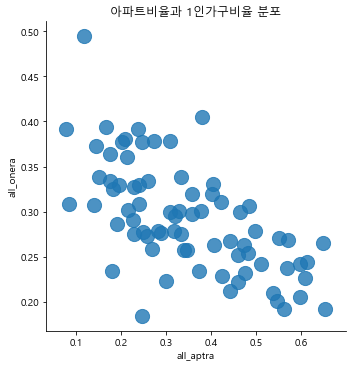

In [34]:
# 아파트 비율과 1인가구 비율에 따른 서울,경기 시군구의 분포
sns.lmplot('all_aptra','all_onera',data=sigunone, fit_reg = False, scatter_kws={"s":200})
plt.title('아파트비율과 1인가구비율 분포')

In [35]:
# 원래는 적정 군집 개수 찾아주는 기법으로 엘보우, 실루엣 , CCC 등을 활용해야함.
# 보통 적정 군집개수가 3~4개로 나오기 때문에  4개로 임의로 정하고 시작함

In [36]:
sigunone2 = sigunone

In [37]:
#필요한 열만
sigunone3 = sigunone2.loc[:,['all_aptra','all_onera']]
sigunone3

,all_aptra,all_onera
0,0.2605,0.3336
1,0.1667,0.3938
2,0.3792,0.4051
3,0.2036,0.3772
4,0.3335,0.3379
...,...,...
70,0.2412,0.3087
71,0.2276,0.2905
72,0.2413,0.3294
73,0.1510,0.3380


In [38]:
kmeans = KMeans(n_clusters=3,algorithm='auto')
kmeans.fit(sigunone3)
sigunone3['cluster']= kmeans.labels_
sigunone3.head()

,all_aptra,all_onera,cluster
0,0.2605,0.3336,0
1,0.1667,0.3938,0
2,0.3792,0.4051,2
3,0.2036,0.3772,0
4,0.3335,0.3379,2


In [39]:
#다시 시군구 옆에 붙여주기 위해서 
sigunone4 = sigunone2.loc[:,['sigun','all_onera']]
sigunone4.head()

,sigun,all_onera
0,서울특별시,0.3336
1,종로구,0.3938
2,중구,0.4051
3,용산구,0.3772
4,성동구,0.3379


In [40]:
#  시군구별 클러스터 생성완료 
sigun5 = pd.merge(sigunone3, sigunone4)
sigun5

,all_aptra,all_onera,cluster,sigun
0,0.2605,0.3336,0,서울특별시
1,0.1667,0.3938,0,종로구
2,0.3792,0.4051,2,중구
3,0.2036,0.3772,0,용산구
4,0.3335,0.3379,2,성동구
...,...,...,...,...
70,0.2412,0.3087,0,포천시
71,0.2276,0.2905,0,여주시
72,0.2413,0.3294,0,연천군
73,0.1510,0.3380,0,가평군


In [41]:
sigun5.sort_values(by="cluster", ascending=True)

,all_aptra,all_onera,cluster,sigun
0,0.2605,0.3336,0,서울특별시
72,0.2413,0.3294,0,연천군
71,0.2276,0.2905,0,여주시
70,0.2412,0.3087,0,포천시
68,0.1811,0.2340,0,광주시
...,...,...,...,...
43,0.3788,0.3004,2,동두천시
16,0.4044,0.3305,2,강서구
46,0.3210,0.2952,2,단원구
10,0.3470,0.2575,2,도봉구


In [42]:
# 군집0의 서울, 경기 지역
sigun5.loc[sigun5['cluster']==0,'sigun':,]

,sigun
0,서울특별시
1,종로구
3,용산구
5,광진구
6,동대문구
7,중랑구
8,성북구
9,강북구
12,은평구
13,서대문구


In [43]:
# 군집1의 서울, 경기 지역
sigun5.loc[sigun5['cluster']==1,'sigun':,]

,sigun
11,노원구
31,영통구
35,분당구
36,의정부시
39,동안구
41,광명시
47,고양시
48,덕양구
49,일산동구
50,일산서구


In [44]:
# 군집2의 서울, 경기 지역
sigun5.loc[sigun5['cluster']==2,'sigun':,]

,sigun
2,중구
4,성동구
10,도봉구
15,양천구
16,강서구
17,구로구
19,영등포구
22,서초구
23,강남구
24,송파구


Text(0.5113, 0.2414, '고양시')

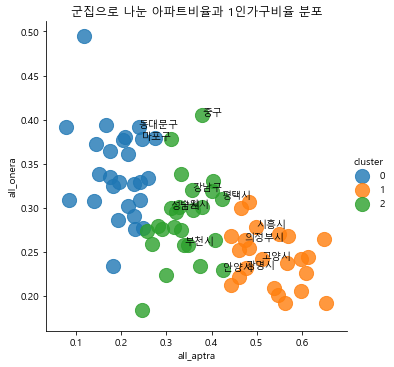

In [45]:
# 아파트 비율과 1인가구 비율에 따른 서울,경기 시군구의 분포
sns.lmplot('all_aptra','all_onera',data=sigun5, fit_reg = False, scatter_kws={"s":200},hue="cluster")
plt.title('군집으로 나눈 아파트비율과 1인가구비율 분포')
plt.text(0.4988,0.2780,'시흥시')
plt.text(0.3577,0.3199,'강남구')
plt.text(0.328,0.3003,'수원시')
plt.text(0.3093,0.2992,'성남시')
plt.text(0.4736,0.2631,'의정부시')
plt.text(0.4256,0.2289,'안양시')
plt.text(0.34,0.2572,'부천시')
plt.text(0.4756,0.2316,'광명시')
plt.text(0.3792,0.4051,'중구')
plt.text(0.2391,0.392,'동대문구')
plt.text(0.4224,0.3102,'평택시')
plt.text(0.2467,0.3777,'마포구')
plt.text(0.5113,0.2414,'고양시')
# 군집1. 아파트비율이 10~20% 사이면서 1인가구 비율이 25%~ 40% 사이 집단
# 군집2. 아파트비율이 20~40% 사이면서 1인가구 비율이 20%~ 35% 사이 집단
# 군집3. 아파트비율이 40~60% 사이면서 1인가구 비율이 20%~ 30% 사이 집단 으로 나누어짐

# 나름 의미있는 세 집단으로 분류되었으며, 분류된 특성에 따라 배달을 시켜먹는 음식의 차이등이 있을것으로 판단되어

# 1인가구 아파트 비율로 구한 군집 데이터 + 배달 데이터 MERGE

In [71]:
# 우선 merge를 위해 변수명 변경
sigun5 = sigun5.rename({'sigun':'gu_name'}, axis='columns')
sigun5['gu_name'] = sigun5['gu_name'].astype(str)
sigun5

,gu_name,all_aptra,men_aptra,wo_aptra,all_onera,men_onera,wo_onera,cluster
0,서울특별시,0.2605,0.2141,0.3005,0.3336,0.2417,0.5038,1
1,종로구,0.1667,0.1514,0.1799,0.3938,0.3036,0.5460,1
2,중구,0.3792,0.3412,0.4117,0.4051,0.3170,0.5477,2
3,용산구,0.2036,0.1706,0.2304,0.3772,0.2804,0.5354,1
4,성동구,0.3335,0.2594,0.4045,0.3379,0.2549,0.4963,2
...,...,...,...,...,...,...,...,...
70,포천시,0.2412,0.2325,0.2512,0.3087,0.2445,0.4719,1
71,여주시,0.2276,0.2040,0.2513,0.2905,0.2104,0.4852,1
72,연천군,0.2413,0.3126,0.1595,0.3294,0.2512,0.5267,1
73,가평군,0.1510,0.1494,0.1525,0.3380,0.2453,0.5423,1


In [70]:
# 경기도와 서울특별시의 시군구별 주문한 업종 카운트
ss = sudo.groupby(['gu_name']).size().reset_index(name='count')
ss['gu_name'] = ss['gu_name'].astype(str)
ss.head()

,gu_name,count
0,가평군,1
1,강동구,6
2,강북구,1894
3,강서구,920
4,고양시 덕양구,215928


In [73]:
sigun6 = pd.merge(ss, sigun5, how='outer',on='gu_name')
sigun6

,gu_name,count,all_aptra,men_aptra,wo_aptra,all_onera,men_onera,wo_onera,cluster
0,가평군,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,강동구,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,강북구,1894.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,강서구,920.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,고양시 덕양구,215928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
131,포천시,NaN,0.2412,0.2325,0.2512,0.3087,0.2445,0.4719,1.0
132,여주시,NaN,0.2276,0.2040,0.2513,0.2905,0.2104,0.4852,1.0
133,연천군,NaN,0.2413,0.3126,0.1595,0.3294,0.2512,0.5267,1.0
134,가평군,NaN,0.1510,0.1494,0.1525,0.3380,0.2453,0.5423,1.0


# merge 가 제대로 이루어지지 않아 데이터 연계 분석을 하지못했다.

# COVID 확진자수 사망자수 날짜별

# 코로나 확진자수에 따라 배달건수가 증가할까?

In [ ]:
# 지역별 코로나 확진자료를 구하지 못하여 전체 코로나 일별 확진자 데이터
# 통계청에서 가져와 날짜 별로 연계하였음.
# 확진자 증가에 따른 배달건수 증가가 어느정도 연관성이 있는지 확인하기위해

In [74]:
covid_conf=pd.read_excel('../data/covid_conf.xlsx',sheet_name=0)

covid_conf.head()

,datetime,conf,death
0,2020. 02. 04,18,0
1,2020. 02. 05,1,0
2,2020. 02. 06,4,0
3,2020. 02. 07,1,0
4,2020. 02. 08,0,0


In [75]:
# 만들어준 deliverycount 열의 PROCESS_DT 열의 형식이 문자열로 되어있어 datetime으로 변경해줌
covid_conf['PROCESS_DT'] = pd.to_datetime(covid_conf['datetime'], format='%Y. %m. %d')

covid_conf.head()

,datetime,conf,death,PROCESS_DT
0,2020. 02. 04,18,0,2020-02-04
1,2020. 02. 05,1,0,2020-02-05
2,2020. 02. 06,4,0,2020-02-06
3,2020. 02. 07,1,0,2020-02-07
4,2020. 02. 08,0,0,2020-02-08


In [76]:
# 기존 날짜 삭제
covid_conf.drop(['datetime'], axis='columns', inplace=True)        
covid_conf.head()

,conf,death,PROCESS_DT
0,18,0,2020-02-04
1,1,0,2020-02-05
2,4,0,2020-02-06
3,1,0,2020-02-07
4,0,0,2020-02-08


# 데이터 결합 (Merge)

In [83]:
# 날짜를 기준으로 확진자수(사망자수)와 배달데이터 합쳐주기 
# 확진자수가 증가함에 따라 배달 건수가 증가하는지 여부를 확인해주기 위해 
# 6월 21일까지의 데이터만 합쳐졌음.
merge_inner = pd.merge(deliverycount, covid_conf)
merge_inner.head()

,PROCESS_DT,induty_nm,count,conf,death
0,2020-02-04,도시락,300,18,0
1,2020-02-04,돈까스/일식,1433,18,0
2,2020-02-04,배달전문업체,464,18,0
3,2020-02-04,분식,3932,18,0
4,2020-02-04,심부름,38,18,0


In [80]:
# 일별 배달상점 개수 그래프 그리기

fig = px.line(merge_inner, x = 'PROCESS_DT', y = 'count')
fig.update_layout(
    title={
        'text': "일별 배달 개수 변화",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [58]:
# 데이터 상으로는 확진자 수가 증가함에 따라 배달건수가 증가한다는 부분을 확인하기는 어렵다고 볼 수 있다.
# 단 데이터가 6월 21일까지 한정되어있다는 점 
# 업종별로 세부 분류를 했을 때 다른결과가 나올 수 있으니 시도 해볼수 있다 
# 예를 들면 코로나 증가에 따른 도시락 업체의 증가유무 
corr = merge_inner.corr(method = 'pearson')
corr

,count,conf,death
count,1.000000,0.026583,-0.136931
conf,0.026583,1.000000,0.307706
death,-0.136931,0.307706,1.000000
